In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [3]:
prices3 = pd.read_csv("../../data/round4/prices_round_4_day_3.csv", delimiter=';')
prices2 = pd.read_csv("../../data/round4/prices_round_4_day_2.csv", delimiter=';')
prices1 = pd.read_csv("../../data/round4/prices_round_4_day_1.csv", delimiter=';')

In [4]:
prices = pd.concat([prices1, prices2, prices3],axis=0)

In [5]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
19996,3,999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
19997,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0
19998,3,999900,COCONUT_COUPON,575.0,43.0,NaN,NaN,NaN,NaN,576,43,NaN,NaN,NaN,NaN,575.5,0.0


In [6]:
coco= prices.loc[prices["product"] == "COCONUT"].reset_index(drop=True)
coupon = prices.loc[prices["product"] == "COCONUT_COUPON"].reset_index(drop=True)
coco_mid = (coco.bid_price_1 + coco.ask_price_1)/2
coupon_mid = (coupon.bid_price_1 + coupon.ask_price_1)/2

Text(0, 0.5, 'COUPON price')

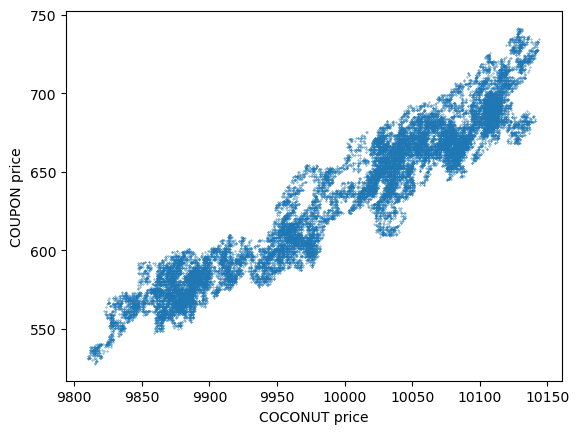

In [32]:
# Checking the moneyness region we are in
plt.scatter(coco_mid, coupon_mid, s=0.1)
plt.xlabel("COCONUT price")
plt.ylabel("COUPON price")

Text(0, 0.5, 'COUPON - 0.5COCO - 4365.5')

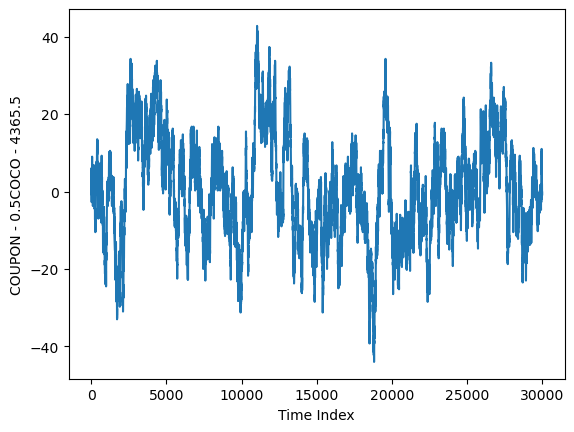

In [67]:
# Plotting the spread
plt.plot(coupon_mid-0.5*coco_mid+4365.5)
plt.xlabel("Time Index")
plt.ylabel("COUPON - 0.5COCO - 4365.5")

In [19]:
# Finding the optimal threshold
spread = coupon_mid-0.5*coco_mid+4365.5
profits = np.zeros([40,20])
for i in range(20):
    for j in range(20):
        pos_thresh = i+1
        neg_thresh = -j-1
        round_trip = 0
        state = 0
        profit = 0
        for val in spread:
            if val >= pos_thresh:
                if state == -1:
                    round_trip +=1
                state = 1
            elif val <= neg_thresh:
                if state == 1:
                    round_trip +=1 
                state = -1
        profit = round_trip*(pos_thresh - neg_thresh-1) # + 1 transaction cost 
        profits[i,j] = profit
        
threshold = np.unravel_index(np.argmax(profits),profits.shape)
print("Optimal threshold", threshold[0] + 1, -threshold[1]-1)

Optimal threshold 9 -10


In [20]:
# If we are only using the latest day
prices = pd.read_csv("./latest_day.csv", delimiter=';')

In [21]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,3,0,ORCHIDS,1090,8,1089.0,5.0,1082.0,49.0,1099,8,1100.0,5.0,1108.0,49.0,1094.5,0.0000
1,3,0,CHOCOLATE,7750,136,NaN,NaN,NaN,NaN,7752,136,NaN,NaN,NaN,NaN,7751.0,0.0000
2,3,0,GIFT_BASKET,69548,2,69547.0,15.0,69546.0,21.0,69559,2,69560.0,15.0,69561.0,21.0,69553.5,0.0000
3,3,0,AMETHYSTS,9996,2,9995.0,26.0,NaN,NaN,10004,2,10005.0,26.0,NaN,NaN,10000.0,0.0000
4,3,0,STARFRUIT,5002,1,5001.0,28.0,NaN,NaN,5008,28,NaN,NaN,NaN,NaN,5005.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,3,99900,STARFRUIT,4977,27,NaN,NaN,NaN,NaN,4983,1,4984.0,26.0,NaN,NaN,4980.0,0.0000
8996,3,99900,GIFT_BASKET,69440,1,69439.0,12.0,69438.0,27.0,69451,1,69452.0,12.0,69453.0,27.0,69445.5,0.0000
8997,3,99900,COCONUT_COUPON,597,40,NaN,NaN,NaN,NaN,598,40,NaN,NaN,NaN,NaN,597.5,-11214.4375
8998,3,99900,ORCHIDS,1051,10,1049.0,2.0,1040.0,48.0,1061,10,1062.0,2.0,1072.0,48.0,1056.0,0.0000


In [22]:
coco= prices.loc[prices["product"] == "COCONUT"].reset_index(drop=True)
coupon = prices.loc[prices["product"] == "COCONUT_COUPON"].reset_index(drop=True)
coco_mid = (coco.bid_price_1 + coco.ask_price_1)/2
coupon_mid = (coupon.bid_price_1 + coupon.ask_price_1)/2

Text(0, 0.5, 'COUPON price')

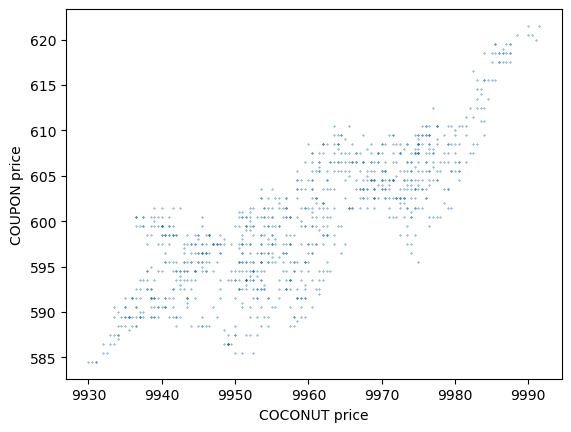

In [23]:
# Checking the moneyness region we are in
plt.scatter(coco_mid, coupon_mid, s=0.1)
plt.xlabel("COCONUT price")
plt.ylabel("COUPON price")

In [26]:
np.median(coupon_mid - 0.5*coco_mid)

-4379.375

In [27]:
# Finding the optimal threshold
spread = coupon_mid-0.5*coco_mid+4380
profits = np.zeros([40,20])
for i in range(20):
    for j in range(20):
        pos_thresh = i+1
        neg_thresh = -j-1
        round_trip = 0
        state = 0
        profit = 0
        for val in spread:
            if val >= pos_thresh:
                if state == -1:
                    round_trip +=1
                state = 1
            elif val <= neg_thresh:
                if state == 1:
                    round_trip +=1 
                state = -1
        profit = round_trip*(pos_thresh - neg_thresh-1) # + 1 transaction cost 
        profits[i,j] = profit
        
threshold = np.unravel_index(np.argmax(profits),profits.shape)
print("Optimal threshold", threshold[0] + 1, -threshold[1]-1)

Optimal threshold 6 -5
